In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

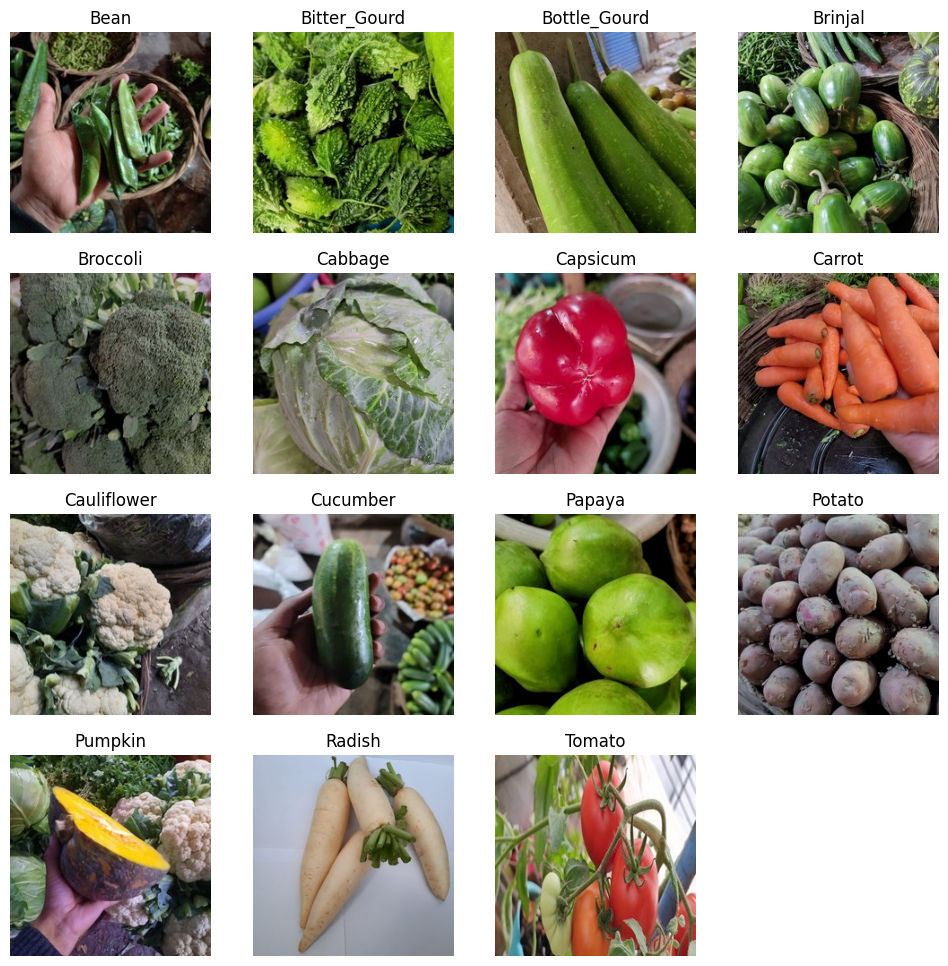

In [7]:
train = "./train"
validation = "./validation/"
test = "./test"
image_categories = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage',
                    'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Create a figure
plt.figure(figsize=(12, 12))
for i, cat in enumerate(image_categories):

    # Load images for the ith category
    image_path = train + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = image.load_img(first_image_path)
    img_arr = image.img_to_array(img)/255.0

    # Create Subplot and plot the images
    plt.subplot(4, 4, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

plt.show()

In [8]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    validation,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='sparse'
)
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='sparse'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                102464    
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                        

In [10]:
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=custom_optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=50,
                    validation_data=validation_generator)

Epoch 1/50


/Users/sukird/Python_learning/sukird/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 [==============================] - 19s 40ms/step - loss: 2.2574 - accuracy: 0.2776 - val_loss: 1.7702 - val_accuracy: 0.4463
Epoch 2/50
469/469 [==============================] - 17s 36ms/step - loss: 1.5869 - accuracy: 0.4835 - val_loss: 1.4739 - val_accuracy: 0.5083
Epoch 3/50
469/469 [==============================] - 17s 36ms/step - loss: 1.3915 - accuracy: 0.5469 - val_loss: 1.3436 - val_accuracy: 0.5540
Epoch 4/50
469/469 [==============================] - 16s 35ms/step - loss: 1.2618 - accuracy: 0.5897 - val_loss: 1.2309 - val_accuracy: 0.5833
Epoch 5/50
469/469 [==============================] - 17s 35ms/step - loss: 1.1633 - accuracy: 0.6249 - val_loss: 1.1347 - val_accuracy: 0.6377
Epoch 6/50
469/469 [==============================] - 17s 36ms/step - loss: 1.0804 - accuracy: 0.6509 - val_loss: 1.0713 - val_accuracy: 0.6510
Epoch 7/50
469/469 [==============================] - 17s 37ms/step - loss: 1.0068 - accuracy: 0.6789 - val_loss: 1.0142 - val_accuracy: 0.6623
Epo

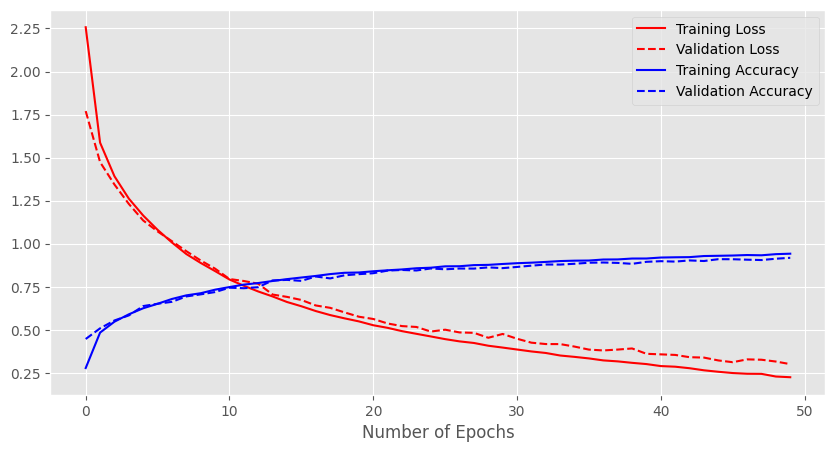

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], c='red', label='Training Loss')
plt.plot(history.history['val_loss'], c='red',
         linestyle='--', label='Validation Loss')
plt.plot(history.history['accuracy'], c='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], c='blue',
         linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [12]:
model.evaluate(test_generator)

94/94 [==============================] - 3s 32ms/step - loss: 0.2944 - accuracy: 0.9197


[0.2943616807460785, 0.9196666479110718]

In [13]:
tf.keras.models.save_model(model,"kuy.h5")

/var/folders/qw/x68hs54566375sgxnm5dtq880000gn/T/ipykernel_6723/1550319886.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,"kuy.h5")
